In [1]:
import pandas as pd
import numpy as np
import re 
import json
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
#deeppavlov.__version__

In [3]:
#import deeppavlov

In [4]:
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

In [5]:
joblib.__version__

'1.1.1'

In [6]:
#!python -m spacy download ru_core_news_md

In [7]:
#import spacy
#activated = spacy.prefer_gpu()
#nlp = spacy.load('ru_core_news_md', disable = ['parser', 'ner']) 

target  
0 - обязанности  resp   
1 - требования  req  
2 - условия  cond  

In [8]:
def tfidf_featuring(tfidf, df):   
    '''Преобразование текста в мешок слов'''
    X_tfidf = tfidf.transform(df['text'])
    feature_names = tfidf.get_feature_names_out()
    X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = feature_names, index = df.index)
    
    return X_tfidf

In [9]:
def validation(X_valid, y_valid):
    catc_valid = catc.predict(X_valid)
    #расчет метрики
    print("f1_macro: ", f1_score(y_valid, catc_valid, average='macro'))
    print("Отчет о классификации: ")
    print(classification_report(y_valid, catc_valid))
    #матрица ошибок
    print("Матрица ошибок: ")
    cm = confusion_matrix(y_valid, catc_valid)#, normalize='true'
    cm_display = ConfusionMatrixDisplay(cm).plot(colorbar=False, cmap="GnBu")

    #влияющие факторы
    fea_imp = pd.DataFrame({'imp': catc.feature_importances_, 'col': X_tfidf.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
    fea_imp.plot(kind='barh', x='col', y='imp', figsize=(8, 6), legend=None)
    plt.title('Важность признаков для модели')
    plt.ylabel('Признаки')
    plt.xlabel('Важность')

In [10]:
path = "data/"
train = pd.read_csv(path + 'df_train.zip', compression='zip')
train.dropna(subset=['text'], inplace=True) 

In [11]:
#train[train.isnull().any(1)]

In [12]:
train.head()

,names,text,target
0,Администратор торгового зала,чистоту и порядок в торговом зале,0
1,Администратор торгового зала,"соблюдение деловой этики в общении, контроль в...",0
2,Администратор торгового зала,обеспечивает организацию работ представителей ...,0
3,Специалист по закупкам,организация и проведение закупок в рамках 223-...,0
4,Специалист по закупкам,"формирование месячной/годовой отчетности, разм...",0


In [13]:
path = "data/"
#test = pd.read_csv(path + 'df_test.zip', compression='zip')

In [14]:
#test.head()

In [15]:
X_train = train.sample(frac=0.1, replace=False, random_state=42, ignore_index=True) #n = 1000, weights='name'
X_train.head()

,names,text,target
0,Официант (шведская линия),"предоставляем корпоративное обучение, тренинги",2
1,Оператор сервисной службы,официальное трудоустройство,2
2,Менеджер по продажам промышленной продукции,"аналитический склад ума, высокая обучаемость",1
3,Специалист по работе с клиентами (ООО ВТБ Меди...,график работы 5/2,2
4,Шеф-кондитер,"создание и подготовка рецептур, технологически...",0


In [16]:
#тренировка модели token_pattern=r'(?u)\b\w\w+\b'
tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=2000, analyzer='word', #max_df = 0.5,
                        token_pattern=r'(?u)\b[а-яА-ЯёЁa-zA-Z][а-яА-ЯёЁa-zA-Z]+\b',
                        #tokenizer=lemmatize,
                        lowercase = True, sublinear_tf=True)
tfidf.fit(X_train['text'])

TfidfVectorizer(max_features=2000, sublinear_tf=True,
                token_pattern='(?u)\\b[а-яА-ЯёЁa-zA-Z][а-яА-ЯёЁa-zA-Z]+\\b')

In [17]:
#```Сохранение результатов TfidfVectorizer для веб-приложения
joblib.dump(tfidf, 'model/tfidf.pkl') 
#Загрузка
#tfidf = joblib.load('model/tfidf.pkl')``` 

['model/tfidf.pkl']

In [19]:
# Мешок слов по всем текстам
X_tfidf = tfidf_featuring(tfidf, X_train)
X_tfidf.head()

,autocad,crm,excel,google,intermediate,it,kpi,microsoft,ms,office,...,электронной,энергичность,эффективности,юридических,юридическое,является,язык,языка,языком,яндекс
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_tfidf.to_csv("temp.csv")

Для экономии памяти

In [10]:
#tfidf = joblib.load('model/tfidf.pkl')
#X_tfidf=pd.read_csv("temp.csv")

In [ ]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_tfidf, 
                                                                X_train['target'], 
                                                                stratify = X_train['target'],
                                                                random_state=42, test_size=0.2)

In [ ]:
catc = CatBoostClassifier(loss_function = 'MultiClass', #eval_metric= "TotalF1",                    
                          learning_rate=0.5, 
                          max_depth = 6, 
                          n_estimators = 10000,
                          l2_leaf_reg = 3.5,
                          auto_class_weights='Balanced',
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU',)
catc.fit(X_train_part, y_train_part, eval_set=(X_valid, y_valid), #cat_features=cat_features,
         early_stopping_rounds = 50, use_best_model=True, verbose=500)

f1_macro:  0.9301572642866766
Отчет о классификации: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     92078
           1       0.95      0.90      0.93     87041
           2       0.94      0.95      0.94     99814

    accuracy                           0.93    278933
   macro avg       0.93      0.93      0.93    278933
weighted avg       0.93      0.93      0.93    278933

Матрица ошибок: 


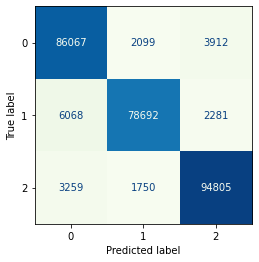

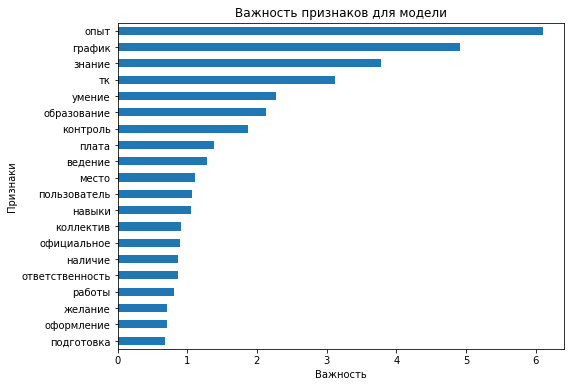

In [143]:
validation(X_valid, y_valid)

In [144]:
#модель для типа фразы в вакансии
catc.save_model('model/model.cbm')

Выборка с hh

In [145]:
path = "data/"
test = pd.read_csv(path + 'df_test.zip', compression='zip')

In [146]:
idx = 0
pattern = r'\:|\;|\.|- |\• |\)|!'
test_ = [s.strip() for s in re.split(pattern, test['text'][idx].lower()) if len(s.strip())>0]
test_

['в связи с расширением, в международной компании olx group открыта вакансия супервайзера команды службы поддержки пользователей',
 'если ты целеустремленный, ты хочешь помогать другим и развиваться вместе с olx',
 'присоединяйся к нашей большой и дружной команде',
 'ниже ты можешь ознакомиться с основными обязанностями, требованиями, а также условиями работы на данной позиции',
 'мы стремимся создать комфортные условия каждому члену нашей команды и заинтересованы в долгосрочном сотрудничестве с достойными кандидатами',
 'обязанности',
 'работа с командой',
 'обучение новых сотрудников, адаптация',
 'организация и проведение тренингов, ежемесячных тестирований',
 'наполнение и актуализация базы знаний для агентов, написание инструкций и коммуникация изменений',
 'статистика и аналитика kpi',
 'сбор и передача данных по агентам для подсчета бонусов',
 'координация работы агентов',
 'контроль достижения kpi агентами',
 'проведение индивидуальной работы с агентами (получение обратной связ

In [147]:
test_tfidf = tfidf_featuring(tfidf, pd.DataFrame({"text": test_}))

In [148]:
#catc_prediction = catc.predict(test_tfidf)
catc_proba = catc.predict_proba (test_tfidf)
pred = np.argmax(catc_proba, axis=1)
prob = np.amax(catc_proba, axis=1)

In [149]:
temp_ = pd.DataFrame({"text": test_})
temp_['target']= np.argmax(catc_proba, axis=1)
temp_['proba']= np.amax(catc_proba, axis=1)
temp_['target']= temp_['target'].replace({0: "Обязанности", 1: 'Требования к кандидату', 
                                           2: 'Условия работы'}, regex=True)
temp_

,text,target,proba
0,"в связи с расширением, в международной компани...",Обязанности,0.796972
1,"если ты целеустремленный, ты хочешь помогать д...",Требования к кандидату,0.421267
2,присоединяйся к нашей большой и дружной команде,Условия работы,0.938409
3,ниже ты можешь ознакомиться с основными обязан...,Требования к кандидату,0.615175
4,мы стремимся создать комфортные условия каждом...,Условия работы,0.681738
5,обязанности,Условия работы,0.544820
6,работа с командой,Обязанности,0.869783
7,"обучение новых сотрудников, адаптация",Обязанности,0.873035
8,"организация и проведение тренингов, ежемесячны...",Обязанности,0.928940
9,наполнение и актуализация базы знаний для аген...,Обязанности,0.921574


In [150]:
temp_[(temp_['target']=='Обязанности')&(temp_['proba']>=0.75)]

,text,target,proba
0,"в связи с расширением, в международной компани...",Обязанности,0.796972
6,работа с командой,Обязанности,0.869783
7,"обучение новых сотрудников, адаптация",Обязанности,0.873035
8,"организация и проведение тренингов, ежемесячны...",Обязанности,0.928940
9,наполнение и актуализация базы знаний для аген...,Обязанности,0.921574
11,сбор и передача данных по агентам для подсчета...,Обязанности,0.987651
12,координация работы агентов,Обязанности,0.931110
13,контроль достижения kpi агентами,Обязанности,0.824506
14,проведение индивидуальной работы с агентами (п...,Обязанности,0.996638
15,"распределение тикетов между агентами, контроль...",Обязанности,0.989326


In [151]:
temp_[(temp_['target']=='Требования к кандидату')&(temp_['proba']>=0.75)]

,text,target,proba
20,выполнение задач в поставленные сроки,Требования к кандидату,0.824179
21,отличные коммуникативные навыки,Требования к кандидату,0.987840
23,желание развиваться и развивать команду,Требования к кандидату,0.963511
24,желание и умение работать на результат,Требования к кандидату,0.999118
26,ответственное отношение к работе,Требования к кандидату,0.965348
27,"грамотная русская и казахская речь, знание каз...",Требования к кандидату,0.999578
28,грамотная письменная речь,Требования к кандидату,0.970240
29,опытный пользователь пк,Требования к кандидату,0.988267
30,аналитический склад ума,Требования к кандидату,0.977734
31,опыт пользования досками бесплатных объявлений,Требования к кандидату,0.937668


In [152]:
temp_[(temp_['target']=='Условия работы')&(temp_['proba']>=0.75)]

,text,target,proba
2,присоединяйся к нашей большой и дружной команде,Условия работы,0.938409
19,требования,Условия работы,0.752736
34,мы должны совпадать по ценностям,Условия работы,0.929877
39,официальное трудоустройство согласно законодат...,Условия работы,0.986357
40,конкурентоспособная и официальная оплата труда,Условия работы,0.982299
41,медицинская страховка после успешного завершен...,Условия работы,0.944760
42,возможность компенсации спорта согласно полити...,Условия работы,0.826311
43,"комфортный, светлый офис",Условия работы,0.976301
47,молодая и активная команда,Условия работы,0.956234
49,яркие и запоминающиеся корпоративные мероприятия,Условия работы,0.987202


In [37]:
cond_list = temp_[(temp_['target']=='Условия работы')&(temp_['proba']>=0.75)]['text'].tolist()

In [38]:
print('Условия работы: ')
for i in cond_list:
    print("- ", i)

Условия работы: 
-  присоединяйся к нашей большой и дружной команде
-  мы стремимся создать комфортные условия каждому члену нашей команды и заинтересованы в долгосрочном сотрудничестве с достойными кандидатами
-  мы должны совпадать по ценностям
-  официальное трудоустройство согласно законодательству рк
-  конкурентоспособная и официальная оплата труда
-  медицинская страховка после успешного завершения испытательного срока
-  комфортный, светлый офис
-  чай, кофе и другие фишки прилагаются
-  постоянное обучение и рост мастерства на ежедневной основе
-  западная культура работы и ведения бизнеса, работа в команде профессионалов
-  молодая и активная команда
-  яркие и запоминающиеся корпоративные мероприятия
-  большой и дружной команде olx


In [153]:
path = '/home/tanya/Документы/Соревнования/ЦП_УФО/job-text-processing/data/'
test = pd.read_csv(path + 'temp.csv')

In [154]:
#[x for x in test_1.strip('[]').split("'") if len(x)>2]
idx=25
test_1 = test['Обязанности'][idx]
test_1 = re.findall(r"'(.*?)'", test_1)  #найти записи между кавычками
test_1 = [x for x in test_1 if len(x)>2]

test_2 = test['Требования'][idx]
test_2 = re.findall(r"'(.*?)'", test_2)  #найти записи между кавычками
test_2 = [x for x in test_2 if len(x)>2]

test_3 = test['Условия'][idx]
test_3 = re.findall(r"'(.*?)'", test_3)  #найти записи между кавычками
test_3 = [x for x in test_3 if len(x)>2]

test_1.extend(test_2)
test_1.extend(test_3)

In [155]:
test_tfidf = tfidf_featuring(tfidf, pd.DataFrame({"text": test_1}))

In [156]:
#catc_prediction = catc.predict(test_tfidf)
catc_proba = catc.predict_proba (test_tfidf)
pred = np.argmax(catc_proba, axis=1)
prob = np.amax(catc_proba, axis=1)

In [172]:
temp_ = pd.DataFrame({"text": test_1})
temp_['target']= np.argmax(catc_proba, axis=1)
temp_['proba']= np.amax(catc_proba, axis=1)
temp_['target']= temp_['target'].replace({0: "Обязанности", 1: 'Требования', 
                                           2: 'Условия работы'}, regex=True)
temp_

,text,target,proba
0,контроль и организация работы проектных органи...,Обязанности,0.993400
1,согласование графиков разработки рд и контроль...,Обязанности,0.976882
2,утверждение комплектов «в производство работ»,Обязанности,0.808178
3,контроль за исполнением обязательств в рамках ...,Обязанности,0.967347
4,"контроль процесса корректировки пд, проверки н...",Обязанности,0.954742
5,высшее образование,Требования,0.984060
6,официальное трудоустройство,Условия работы,0.996519
7,своевременную выплату заработной платы,Условия работы,0.868450
8,"график работы: пн-чт 09:00-18:00, пн 09:00-16:45",Условия работы,0.982081


In [177]:
resp = temp_[(temp_.target=="Обязанности")&(temp_.proba>=0.75)]['text'].tolist()
resp

['контроль и организация работы проектных организаций по разработке рд,в рамках заключенных гк',
 'согласование графиков разработки рд и контроль за их исполнением',
 'утверждение комплектов «в производство работ»',
 'контроль за исполнением обязательств в рамках гк подрядчиком роскапстрой, связанных с проверкой разработанных комплектов рд',
 'контроль процесса корректировки пд, проверки на соответствие утвержденной рд и повторного прохождения ггэ']

In [180]:
s=''
for i in resp:
    print("- ", i)
    s+="- " + i + "\n"

-  контроль и организация работы проектных организаций по разработке рд,в рамках заключенных гк
-  согласование графиков разработки рд и контроль за их исполнением
-  утверждение комплектов «в производство работ»
-  контроль за исполнением обязательств в рамках гк подрядчиком роскапстрой, связанных с проверкой разработанных комплектов рд
-  контроль процесса корректировки пд, проверки на соответствие утвержденной рд и повторного прохождения ггэ


In [181]:
s

'- контроль и организация работы проектных организаций по разработке рд,в рамках заключенных гк\n- согласование графиков разработки рд и контроль за их исполнением\n- утверждение комплектов «в производство работ»\n- контроль за исполнением обязательств в рамках гк подрядчиком роскапстрой, связанных с проверкой разработанных комплектов рд\n- контроль процесса корректировки пд, проверки на соответствие утвержденной рд и повторного прохождения ггэ\n'

In [183]:
'контроль и организация работы проектных организаций по разработке рд '.capitalize() 

'Контроль и организация работы проектных организаций по разработке рд '